In [1]:
#load data
import pandas as pd
import numpy as np
data = pd.read_csv('iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [2]:
print(data)

     sepal length  sepal width  petal length  petal width          target   
0             5.1          3.5           1.4          0.2     Iris-setosa  \
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     label  
0        0  
1        0  
2        0  
3        0  
4        0

In [3]:
#define X and y
X = data.drop(['target','label'],axis=1)
y = data.loc[:,'label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [4]:
#establish knn model and calculate the accuracy
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)
y_predict = KNN.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.96


In [5]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)
print(X_norm)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [6]:
#calcualte the mean and sigma
x1_mean = X.loc[:,'sepal length'].mean()
x1_norm_mean = X_norm[:,0].mean()
x1_sigma = X.loc[:,'sepal length'].std()
x1_norm_sigma = X_norm[:,0].std()
print(x1_mean,x1_sigma,x1_norm_mean,x1_norm_sigma)

5.843333333333334 0.828066127977863 -4.736951571734001e-16 1.0


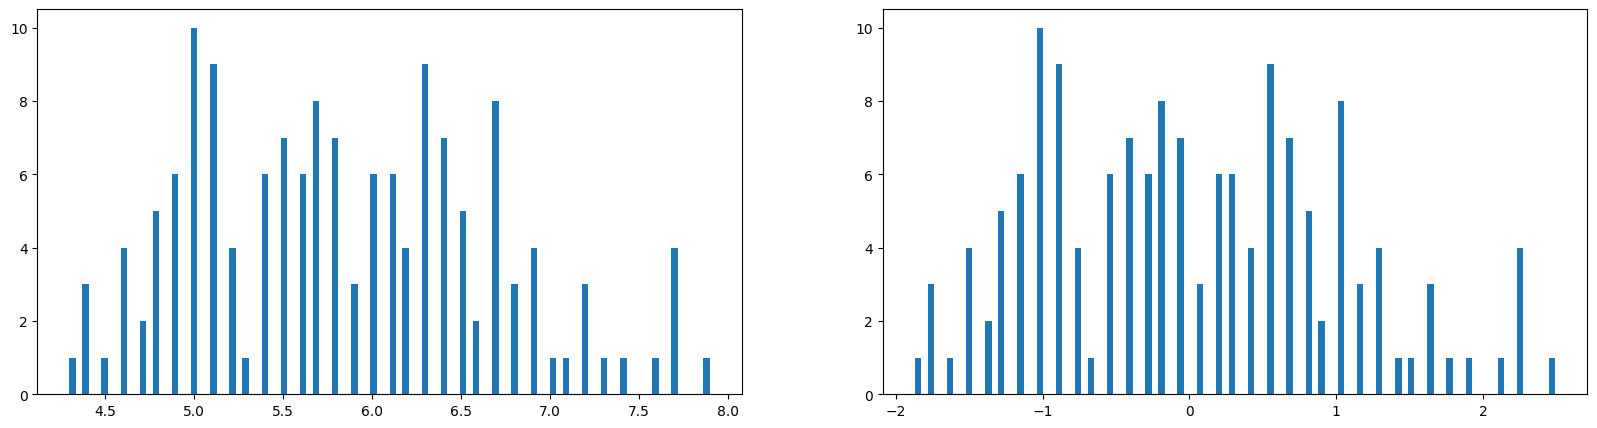

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(X.loc[:,'sepal length'],bins=100)
plt.subplot(122)
plt.hist(X_norm[:,0],bins=100)

plt.show()

In [8]:
print(X.shape)

(150, 4)


In [9]:
#pca analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_norm)
#calculate the variance ratio of each principle components
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.72770452 0.23030523 0.03683832 0.00515193]


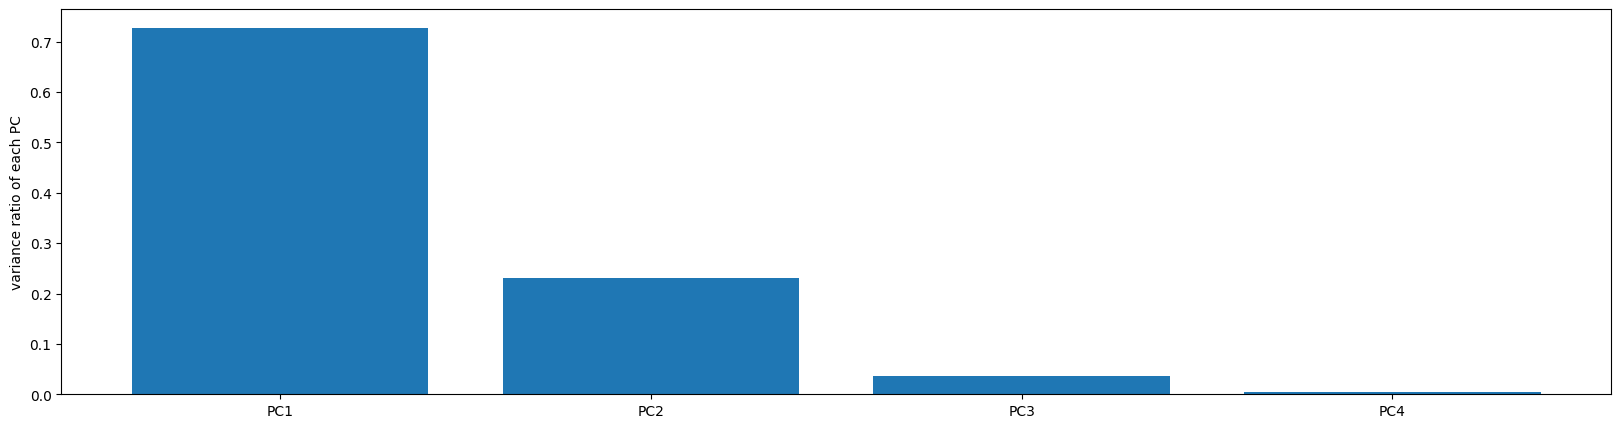

In [10]:
fig2 = plt.figure(figsize=(20,5))
plt.bar([1,2,3,4],var_ratio)
plt.xticks([1,2,3,4],['PC1','PC2','PC3','PC4'])
plt.ylabel('variance ratio of each PC')
plt.show()

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
X_pca.shape

(150, 2)

In [12]:
type(X_pca)

numpy.ndarray

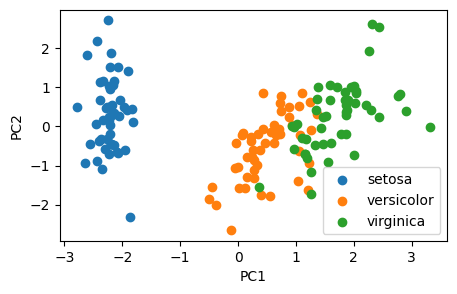

In [13]:
#visualize the PCA result
fig3 = plt.figure(figsize=(5,3))
setosa=plt.scatter(X_pca[:,0][y==0],X_pca[:,1][y==0])
versicolor=plt.scatter(X_pca[:,0][y==1],X_pca[:,1][y==1])
virginica=plt.scatter(X_pca[:,0][y==2],X_pca[:,1][y==2])
plt.legend((setosa,versicolor,virginica),('setosa','versicolor','virginica'))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [14]:
fig3.savefig('1.png')

In [15]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_pca,y)
y_predict = KNN.predict(X_pca)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.9466666666666667
